In [11]:
!pip install scikit-learn
!pip install matplotlib-venn

In [12]:
!pip install gensim

In [13]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'

--2021-03-14 11:57:15--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.87.158
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.87.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  85.3MB/s    in 22s     

2021-03-14 11:57:37 (71.1 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [14]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [15]:
result = model.most_similar("welder")
print(result)

[('machinist', 0.7536988854408264), ('electrician', 0.739203691482544), ('carpenter', 0.7170171737670898), ('mechanic', 0.6851776838302612), ('welding', 0.6698108911514282), ('pipefitter', 0.6676819324493408), ('pipe_fitter', 0.6649168729782104), ('millwright', 0.6574079990386963), ('journeyman_electrician', 0.6564021110534668), ('mechanical_engineer', 0.6508504748344421)]


In [16]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman','king'],negative=['man'],topn=5)
print(result)
result1 = model.most_similar_cosmul(positive=['woman','king'],negative=['man'],topn=5)
print(result1)

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133)]
[('queen', 0.9314123392105103), ('monarch', 0.858533501625061), ('princess', 0.8476566076278687), ('Queen_Consort', 0.8150269985198975), ('queens', 0.8099815249443054)]


**some words tested to be used for newly worked out data 2019_Massachusetts using wv.similarity=.similarity**

In [17]:
print(model.wv.similarity("man","maid"))
print(model.wv.similarity("woman","maid"))
print(model.wv.similarity("men","statisticians"))
print(model.wv.similarity("women","statisticians"))
print(model.wv.similarity("men","therapists"))
print(model.wv.similarity("women","therapists"))
print(model.wv.similarity("women","legislators"))
print(model.wv.similarity("women","Operators"))
print(model.wv.similarity("women","Logistics"))

0.31937593
0.5017852
0.21211268
0.19630387
0.11642223
0.22173055
0.16270211
0.04635876
0.009982183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """

**previously seen occupations for 2015_occ_(since1950) as done in base paper(garg et al.) with singular and plural words**

In [18]:
print(model.similarity("man","maid"))
print(model.similarity("woman","maid"))

0.31937593
0.5017852


In [19]:
print(model.similarity("men","maids"))
print(model.similarity("women","maids"))

0.24430491
0.34649765


In [20]:
print(model.similarity("man","engineer"))
print(model.similarity("man","mechanic"))
print(model.similarity("man","carpenter"))
print(model.similarity("man","housekeeper"))
print(model.similarity("man","secretary"))
print(model.similarity("man","dancer"))
print(model.similarity("man","librarian"))
print(model.similarity("man","nurse"))

0.15128928
0.32070178
0.35935763
0.33341616
0.04001512
0.2439171
0.12730972
0.2547229


In [21]:
print(model.similarity("woman","engineer"))
print(model.similarity("woman","mechanic"))
print(model.similarity("woman","carpenter"))
print(model.similarity("woman","housekeeper"))
print(model.similarity("woman","secretary"))
print(model.similarity("woman","dancer"))
print(model.similarity("woman","librarian"))
print(model.similarity("woman","nurse"))

0.09435377
0.22833556
0.28263456
0.47661752
0.0904883
0.3646355
0.26856342
0.44135594


**Newly tried out words- cosine similarity-gender vs occupations for Massachusets_2019_occ**

In [22]:
print(model.similarity("woman","investigator"))

0.21725209


In [23]:
print(model.similarity("man","investigator"))
print(model.similarity("man","official"))
print(model.similarity("man","lawyer"))

0.16111293
0.15322672
0.16722976


In [24]:
print(model.similarity("woman","legislator"))

0.32118675


In [25]:
print(model.similarity("woman","executive"))

0.024933225


In [26]:
print(model.similarity("woman","compliance"))
#no output with compliance_officer,complianceofficer or with either uppercase(words are not case sensitive)

-0.055862155


In [27]:
print(model.similarity("woman","lawyer"))

0.22423628


In [28]:
print(model.similarity("woman","chief_executiveofficer"))#1...
#no other combinations of chief executive officer worked
print(model.similarity("woman","chief_executive"))#2....seems the nearest
print(model.similarity("woman","chiefexecutive"))#3......
print(model.similarity("woman","qwerty"))#non-sense

-0.09622017
-0.036007345
-0.08284115
0.044886094


In [29]:
print(model.similarity("woman","estimator"))#1....-ve association between the words seems bit intriguing;(-0.00871)
print(model.similarity("woman","accountant"))#2.....ONLY UNDERSTANDABLE--------------------------
print(model.wv.similarity("woman","analyst"))#3..tried using wv.similarity..NO difference
print(model.similarity("woman","analyst"))#4...-ve association between words is bit awkward again;(-0.0378190)
print(model.similarity("man","analyst"))#5....not worth using ..probably unable to understand..word doesnt exist
print(model.similarity("woman","manager"))#6.......ONLY UNDERSTANDABLE------------
print(model.similarity("woman","analytics"))#7...atleast this seems to be better than "analyst" ;(0.026573).....ONLY UNDERSTANDABLE------
print(model.similarity("man","analytics"))#8...some sense again PARTLY UNDERSTANDABLE...but result making no sense
#substitution depends upon the words closest to the above selected words

-0.008717311
0.20212336
-0.037819084
-0.037819084
-0.06795036
0.018229041
0.026573561
0.01346856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
print(model.similarity("woman","financial"))# unable to gather insight
print(model.similarity("woman","finance"))#again not apt
print(model.similarity("man","financial"))#3.....not much insight
print(model.similarity("man","investment"))#4.....hardly any association but dataset shows high proportion of man in investment analyst
print(model.similarity("woman","investment"))#5.....investment and woman negative association..unable to gather insight
print(model.similarity("man","advisor"))# might work........
print(model.similarity("woman","advisor"))
print(model.similarity("man","underwriter"))#works........
print(model.similarity("woman","underwriter"))
print(model.similarity("woman","officer"))# works.......
print(model.similarity("man","officer"))

0.050643984
-0.019560764
0.008122948
0.038620967
-0.001817194
0.019934274
0.0269237
0.020635225
0.09274571
0.2574699
0.25191665


In [31]:
print(model.similarity("man","estimator"))# not making much sense again if it is compared with woman also
print(model.similarity("woman","fundraiser"))
print(model.similarity("woman","planner"))#...strange ..!!! more women planner than men in data as well as in association 
print(model.similarity("man","planner"))

0.047234923
0.18111074
0.068731815
0.042321917


In [32]:
print(model.similarity("man","comptroller"))
print(model.similarity("woman","comptroller"))

0.018218303
0.08122176


In [33]:
print(model.similarity("man","accountant"))
print(model.similarity("woman","accountant"))
print(model.similarity("man","auditor"))
print(model.similarity("woman","auditor"))

0.20663752
0.20212336
0.041380987
0.10431842


In [34]:
print(model.similarity("man","lender"))
print(model.similarity("woman","lender"))

0.056589473
0.14371389


In [35]:
print(model.similarity("woman","agent"))
print(model.similarity("man","agent"))
print(model.similarity("woman","purchaser"))#...makes more sense
print(model.similarity("man","purchaser"))
print(model.similarity("woman","middleman"))#........ :) as expected
print(model.similarity("man","middleman"))
print(model.similarity("woman","buyer"))#.....makes more sense
print(model.similarity("man","buyer"))

0.10983771
0.17585923
0.19175237
0.1557307
0.0823722
0.12087475
0.21311761
0.15895228


In [36]:
print(model.similarity("woman","management"))#..if one compares men then no-sense
print(model.similarity("man","management"))#....some sense but not completely
print(model.similarity("woman","logistics"))
print(model.similarity("man","logistics"))
print(model.similarity("man","supplychain"))
print(model.similarity("woman","supplychain"))

-0.022638291
0.021651665
-0.03877483
-0.003342857
-0.104947895
-0.04107525


In [37]:
print(model.similarity("woman","specialist"))#..........using this will make the occupations loose specificity ..too general
#..might convey different meanings

0.0047455304


In [38]:
print(model.similarity("woman","firefighter"))
print(model.similarity("woman","inspector"))#wanted to use fireinspector but no output(can be used as firefighter...as same proportion for fireinspector 
#and firefighter)

0.35240024
0.19307195


In [39]:
print(model.similarity("woman","journalist"))
print(model.similarity("woman","newsperson"))
print(model.similarity("woman","drafter"))
print(model.similarity("woman","draftsperson"))#can take anyone between draftsperson and drafter 
                                               #as the association is same more or less.....although draftsperson makes more sense as more associated(0.09143)
print(model.similarity("woman","chef"))
print(model.similarity("woman","detective"))
print(model.similarity("man","detective"))
print(model.similarity("woman","jailer"))# will go with bailiff as jailer shows bit differernt results i.e. woman are more associated on the contrary it is more related to man
print(model.similarity("man","jailer"))

0.29854947
0.27181
0.050157964
0.091430746
0.1629965
0.35151663
0.37438804
0.33303544
0.29502702


In [40]:
print(model.similarity("woman","postmaster"))#1..not a gender neutral word but still it is an anomaly as postmaster has more of woman association than man
print(model.similarity("man","postmaster"))#2..
print(model.similarity("woman","postman"))#3..not a gender neutral word
print(model.similarity("woman","postwoman"))#4..more related
print(model.similarity("man","postman"))#5...mail carrier, mailman, mailwoman, postal carrier, postman, postwoman, or letter carrier(all-double-words)
#mailperson is better although it is not there in google news word embeddings
print(model.similarity("woman","postie"))#6...
print(model.similarity("man","postie"))#7...postie is better word as it exists in the google word embeddings but refers to postman;not a gender-neutral word
#In India,The Parliamentary Standing Committee on Information Technology, 
#chaired by BJP MP Anurag Thakur, has recommended to the postal department to use gender neutral term and call 'postman' as 'postperson'
#print(model.similarity("woman","postal carrier"))#not in vocabulary
#print(model.similarity("woman","postperson"))#not in vocabulary for neither man or woman

0.27380297
0.25244063
0.33614162
0.3601427
0.41171408
0.28044662
0.3082234


In [41]:
print(model.similarity("woman","paramedics"))

0.25862125


In [42]:
print(model.similarity("woman","recruiter"))
print(model.similarity("man","recruiter"))

0.17196336
0.18241338


In [43]:
print(model.similarity("woman","broker"))
print(model.similarity("woman","agent"))
print(model.similarity("woman","typist"))
print(model.similarity("woman","typesetter"))
print(model.similarity("woman","teller"))
print(model.similarity("man","teller"))
print(model.similarity("woman","audiologist"))
print(model.similarity("man","audiologist"))
print(model.similarity("man","counselor"))

0.12887813
0.10983771
0.26938513
0.20157969
0.3512208
0.30771255
0.10602327
-0.036998414
0.116191395


In [44]:
print(model.similarity("man","manicurist"))
print(model.similarity("woman","manicurist"))#towards woman
print(model.similarity("man","barber"))#towards man
print(model.similarity("woman","barber"))
print(model.similarity("man","hairstylist"))
print(model.similarity("woman","hairstylist"))#towards woman
print(model.similarity("man","cosmetologist"))#checking for relevant usage of cosmetologist vs beautician vs haistylist
print(model.similarity("woman","cosmetologist"))#towards woman
print(model.similarity("man","beautician"))
print(model.similarity("woman","beautician"))#towards woman...seems more apt as compared to hairstylist and cosmetologist

0.19229981
0.39609376
0.34525368
0.26629996
0.19508705
0.33350044
0.18427607
0.3242003
0.26517054
0.44169477


In [45]:
print(model.similarity("woman","facialist"))
print(model.similarity("man","facialist"))
print(model.similarity("woman","guide"))
print(model.similarity("man","guide"))
print(model.similarity("man","agent"))#5.........
print(model.similarity("woman","agent"))#6..........comparision
print(model.similarity("man","programmer"))
print(model.similarity("woman","programmer"))
print(model.similarity("man","developer"))
print(model.similarity("woman","developer"))
print(model.similarity("man","actuary"))

0.20789005
0.02252383
0.05072439
0.100356646
0.17585923
0.10983771
0.12616901
0.089927144
0.13249062
0.09600442
0.043732874


In [46]:
print(model.similarity("woman","researcher"))
print(model.similarity("man","researcher"))
print(model.similarity("woman","consultant"))
print(model.similarity("man","consultant"))
print(model.similarity("woman","stocker"))
print(model.similarity("woman","supervisor"))
print(model.similarity("woman","attendant"))#attendant is better over host/hostess
print(model.similarity("man","attendant"))
print(model.similarity("woman","usher"))
print(model.similarity("woman","hostess"))#can't use this word as not gender neutral
print(model.similarity("man","host"))#can't use this word as not gender neutral
print(model.similarity("woman","cleaner"))
print(model.similarity("man","cleaner"))#cleaner is taken very generally might nor bring out variation between housekeeper(female-dominated) vs vehicle 
#cleaner(male-dominated) 

0.12048627
0.039349996
0.07272311
0.032411788
0.14559919
0.1896553
0.30658424
0.2741861
0.08104671
0.36809936
0.07871912
0.14622737
0.14691284


In [47]:
print(model.similarity("man","strategist"))#.......... :(( tough time with selecting words
print(model.similarity("woman","strategist")) ### ....doesnt suit

-0.010138751
-0.02568594


In [48]:
print(model.similarity("man","assessor"))
print(model.similarity("man","appraiser"))
print(model.similarity("woman","appraiser"))#seems good to be considered
print(model.similarity("woman","assessor"))
print(model.similarity("woman","cost"))# does not make any sense

0.07494862
0.06705556
0.12778834
0.109875984
0.0074569276


In [49]:
print(model.similarity("woman","tester"))# would go with this word
print(model.similarity("man","tester"))

0.12744452
0.11637468


In [50]:
print(model.similarity("woman","sociologist"))#....just for fun, wanted to check how are these related

0.095642306


In [51]:
print(model.similarity("woman","dispatcher"))#....interesting
print(model.similarity("man","dispatcher"))

0.36976632
0.29970416


In [52]:
print(model.similarity("man","worker"))
print(model.similarity("woman","worker"))
print(model.similarity("woman","songwriter"))
print(model.similarity("woman","composer"))
print(model.similarity("woman","deejay"))
print(model.similarity("man","deejay"))

0.33030337
0.39783823
0.21773805
0.1552975
0.1634914
0.20499209


In [53]:
print(model.similarity("woman","anchor"))
print(model.similarity("man","anchor"))
print(model.similarity("man","announcer"))
print(model.similarity("woman","announcer"))
print(model.similarity("woman","lobbyist"))
print(model.similarity("woman","lobbyist"))
print(model.similarity("woman","police"))
print(model.similarity("man","police"))

0.10386158
0.09314407
0.23615736
0.13097747
0.112486035
0.112486035
0.3686657
0.366551


In [54]:
print(model.similarity("woman","abstractor"))
print(model.similarity("man","abstractor"))

0.091712564
0.032564778


In [55]:
print(model.similarity("man","actor"))#.....results are quite natural...
print(model.similarity("woman","actor"))#.........cant be used
print(model.similarity("woman","actress"))#.........
print(model.similarity("woman","compounder"))
print(model.similarity("woman","podiatrist"))
print(model.similarity("man","podiatrist"))

0.35259384
0.31721884
0.45852387
0.18276165
0.2334379
0.15695667


In [56]:
print(model.similarity("man","acupuncturist"))#....will be used
print(model.similarity("man","hygienist"))
print(model.similarity("woman","sanitarian"))
print(model.similarity("man","sanitarian"))#........not showing much of association and hence would go with 
print(model.similarity("woman","interpretor"))
print(model.similarity("woman","translator"))
print(model.similarity("woman","sonographer"))
print(model.similarity("woman","optician"))
print(model.similarity("woman","transcriptionist"))
print(model.similarity("woman","phlebotomist"))
print(model.similarity("woman","assistant"))
print(model.similarity("woman","dishwasher"))
print(model.similarity("man","dishwasher"))

0.18750092
0.017827976
0.05084941
-0.008297137
0.20846726
0.2055982
0.27558535
0.21555188
0.20353049
0.25823656
0.12619506
0.1832609
0.11250146


In [57]:
print(model.similarity("woman","mortician"))
print(model.similarity("man","mortician"))

0.2229747
0.25848088


In [58]:
print(model.similarity("man","embalmers"))
print(model.similarity("man","telemarketers"))

0.06297449
0.073322


In [59]:
print(model.similarity("man","glazier"))
print(model.similarity("man","roofer"))
print(model.similarity("man","pipelayer"))

0.23966059
0.3401932
0.015779402


In [60]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
import pandas as pd
Utah_2019 = pd.read_csv('/content/gdrive/My Drive/Data_Dissertation/Utah_2019.csv')
print(Utah_2019)

                                        SOC_Codes_2018  ...    fe
0                  MGR-General And Operations Managers  ...  2711
1                 MGR-Chief Executives And Legislators  ...  2543
2              MGR-Advertising And Promotions Managers  ...    96
3                               MGR-Marketing Managers  ...  3041
4                                   MGR-Sales Managers  ...  1504
..                                                 ...  ...   ...
455                  TRN-Other Material Moving Workers  ...   129
456  MIL-Military Officer Special And Tactical Oper...  ...    26
457       MIL-First-Line Enlisted Military Supervisors  ...    56
458  MIL-Military Enlisted Tactical Operations And ...  ...    46
459                   MIL-Military, Rank Not Specified  ...   168

[460 rows x 7 columns]


In [62]:
print(Utah_2019.shape)

(460, 7)


In [63]:
print(Utah_2019.head())

                            SOC_Codes_2018   Occupation  ...     ma    fe
0      MGR-General And Operations Managers      manager  ...   7090  2711
1     MGR-Chief Executives And Legislators      sheriff  ...  11512  2543
2  MGR-Advertising And Promotions Managers      manager  ...    149    96
3                   MGR-Marketing Managers      manager  ...   3117  3041
4                       MGR-Sales Managers  salesperson  ...   4664  1504

[5 rows x 7 columns]


In [64]:
print(Utah_2019)

                                        SOC_Codes_2018  ...    fe
0                  MGR-General And Operations Managers  ...  2711
1                 MGR-Chief Executives And Legislators  ...  2543
2              MGR-Advertising And Promotions Managers  ...    96
3                               MGR-Marketing Managers  ...  3041
4                                   MGR-Sales Managers  ...  1504
..                                                 ...  ...   ...
455                  TRN-Other Material Moving Workers  ...   129
456  MIL-Military Officer Special And Tactical Oper...  ...    26
457       MIL-First-Line Enlisted Military Supervisors  ...    56
458  MIL-Military Enlisted Tactical Operations And ...  ...    46
459                   MIL-Military, Rank Not Specified  ...   168

[460 rows x 7 columns]


In [65]:
print(Utah_2019.Occupation.to_string(index=False))

          manager
          sheriff
          manager
          manager
      salesperson
          manager
          manager
          manager
          manager
      comptroller
          manager
          manager
          manager
          manager
          manager
          manager
           farmer
          manager
    administrator
        architect
          manager
          manager
          manager
          manager
          manager
          manager
          manager
         director
          manager
            buyer
            buyer
        purchaser
        appraiser
          officer
        estimator
        recruiter
          manager
       consultant
       consultant
          planner
       fundraiser
       researcher
       accountant
        appraiser
          officer
        analytics
          officer
          officer
      underwriter
           lender
        scientist
        scientist
         engineer
         engineer
         engineer
       pro

In [66]:
# to identify which occupations are not present in our pre-trained word embeddings vocabulary so that our next step would be to delete those observations 
# from the copy of dataframe(gapminder_2015) 
for index, row in Utah_2019.iterrows():
    x = (row['Occupation'])
    # print(x)
    if(x in model.vocab):
      # print(model.similarity("woman",x)-model.similarity("man",x))
      print("")
    else:
      print(x)
      print(0)

In [67]:
#deep copy
df = Utah_2019.copy(deep=True)
print(df)

                                        SOC_Codes_2018  ...    fe
0                  MGR-General And Operations Managers  ...  2711
1                 MGR-Chief Executives And Legislators  ...  2543
2              MGR-Advertising And Promotions Managers  ...    96
3                               MGR-Marketing Managers  ...  3041
4                                   MGR-Sales Managers  ...  1504
..                                                 ...  ...   ...
455                  TRN-Other Material Moving Workers  ...   129
456  MIL-Military Officer Special And Tactical Oper...  ...    26
457       MIL-First-Line Enlisted Military Supervisors  ...    56
458  MIL-Military Enlisted Tactical Operations And ...  ...    46
459                   MIL-Military, Rank Not Specified  ...   168

[460 rows x 7 columns]


In [68]:
for index, row in df.iterrows():
    x = (row['Occupation'])
    # print(x,model.similarity("woman",x),model.similarity("man",x),model.similarity("woman",x)-model.similarity("man",x))

      
df['Average_distance_Women'] = df.apply(lambda row: model.similarity("woman",row['Occupation']) , axis = 1) 
df['Average_distance_Men'] = df.apply(lambda row: model.similarity("man",row['Occupation']) , axis = 1) 
df['Embedding_Bias'] = df['Average_distance_Women']-df['Average_distance_Men']
df['Women_Occupation_%difference']=df['Female']-df['Male']
print(df)

                                        SOC_Codes_2018  ... Women_Occupation_%difference
0                  MGR-General And Operations Managers  ...                    -0.446791
1                 MGR-Chief Executives And Legislators  ...                    -0.638136
2              MGR-Advertising And Promotions Managers  ...                    -0.216327
3                               MGR-Marketing Managers  ...                    -0.012342
4                                   MGR-Sales Managers  ...                    -0.512322
..                                                 ...  ...                          ...
455                  TRN-Other Material Moving Workers  ...                    -0.715232
456  MIL-Military Officer Special And Tactical Oper...  ...                    -0.746341
457       MIL-First-Line Enlisted Military Supervisors  ...                    -0.800000
458  MIL-Military Enlisted Tactical Operations And ...  ...                    -0.834234
459                  

In [69]:
print(df.columns)
df56=(df[['Occupation','Embedding_Bias', 'Women_Occupation_%difference']].groupby('Occupation').mean())

Index(['SOC_Codes_2018', 'Occupation', 'Female', 'Male', 'Total', 'ma', 'fe',
       'Average_distance_Women', 'Average_distance_Men', 'Embedding_Bias',
       'Women_Occupation_%difference'],
      dtype='object')


In [70]:
# df.drop(columns=['Occupation','Embedding_Bias', 'Women_Occupation_%difference'], inplace=True)

In [71]:
# df.drop(columns=['Female', 'Male'], inplace=True)

In [72]:
print(df56)

               Embedding_Bias  Women_Occupation_%difference
Occupation                                                 
abstractor           0.059148                      0.221719
accountant          -0.004514                      0.004363
actuary              0.007154                     -0.917647
acupuncturist        0.091821                      1.000000
administrator        0.056580                      0.101058
...                       ...                           ...
waitstaff            0.058179                      0.312355
welder              -0.042720                     -0.887622
woodworker          -0.063757                     -0.842986
worker               0.067535                     -0.400121
writer               0.003478                      0.192850

[174 rows x 2 columns]


In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

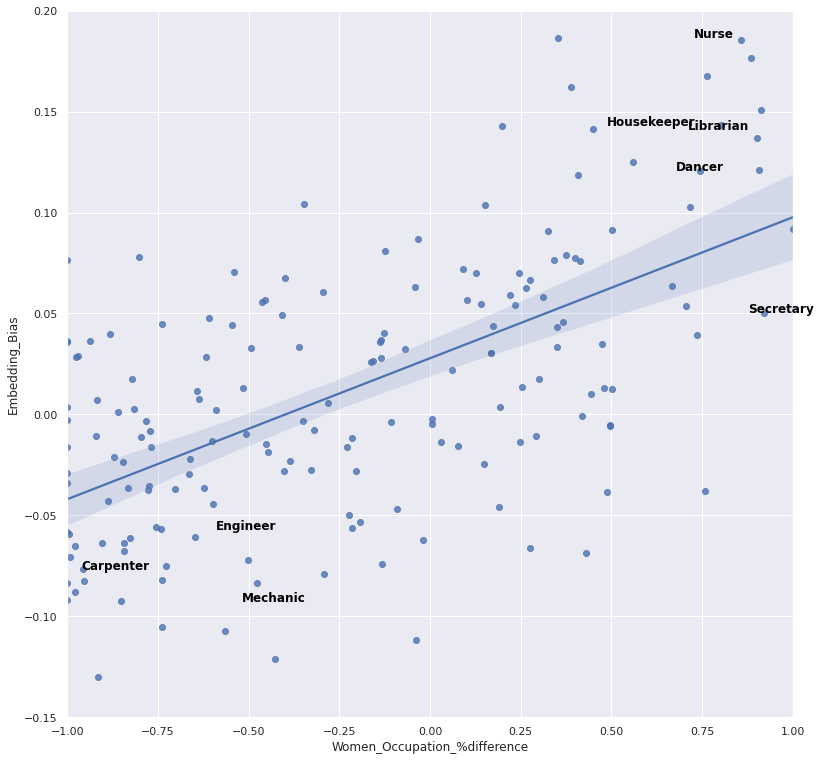

In [76]:
fig, ax = plt.subplots()

xlim = [-1,1]
ylim = [-0.15,0.2]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
p1=sns.regplot(x="Women_Occupation_%difference", y="Embedding_Bias", data=df56, truncate=False);
sns.set(rc={'figure.figsize':(13,13)})



p1.text(0.678188, 0.120718,"Dancer", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.878216, 0.050473,"Secretary",horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.711687, 0.141254,"Librarian", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.726659, 0.186633,"Nurse", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.486705, 0.143201,"Housekeeper", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(-0.962318,-0.076723,"Carpenter", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(-0.591076,-0.056936,"Engineer", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(-0.519246,-0.092366,"Mechanic", horizontalalignment='left', size='medium', color='black', weight='semibold')
# plt.show()
plt.savefig('p1.png')

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
X = df56[['Women_Occupation_%difference']]
y = df56[['Embedding_Bias']]
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())
# OLS regression of Embedding_Bias on Women_Occupation_%difference

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:         Embedding_Bias   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     94.68
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           4.21e-18
Time:                        12:00:04   Log-Likelihood:                 260.93
No. Observations:                 174   AIC:                            -517.9
Df Residuals:                     172   BIC:                            -511.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           